<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Mohammad Jamshidi
### Student Number : 98100718
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
class DataPreparation():
    
    def __init__(self, dataset_csv_path, test_size=0.2, random_state=42, class_labels_change={1:1, 0:-1}):
        self.dataset_csv_path = dataset_csv_path
        self.test_size = test_size
        self.random_state = random_state
        self.class_labels_change = class_labels_change
        self.feature_names = None
        self.target_name = None
        self.find_feature_target_names()
        self.features_data = None
        self.target_data = None
        self.data_num = None
        self.separate_data()
        self.modify_class_labels()
        
    def find_feature_target_names(self):
        """ 
        Finding names of features and target.
        Args: self
        Returns: 
        """
        with open (self.dataset_csv_path, 'r') as file:
            header = file.readline()
        header = np.array([name for name in header.split(',')])
        self.feature_names = header[0:-1]
        self.target_name = header[-1]

    def separate_data(self):
        """
        Separating dataset into features and target.
        Args: self
        Returns: 
        """
        dataset = np.loadtxt(self.dataset_csv_path, delimiter=',', skiprows=1)
        self.data_num = dataset.shape[0]
        features_cols_indices = [_ for _ in range(len(self.feature_names))]
        target_col_index = len(self.feature_names)
        self.features_data = dataset[:, features_cols_indices]
        self.target_data = dataset[:, target_col_index]

    def modify_class_labels(self):
        """    
        Changing labels of classes if necessary.
        Args: self
        Returns: 
        """
        self.separate_data()
        for (i, label) in enumerate(list(self.class_labels_change.keys())):
            new_label = list(self.class_labels_change.values())[i]
            new_arr = self.target_data
            resulted_target = np.where(new_arr==label, new_label, new_arr)
            self.target_data = resulted_target

    def split_data(self):
        """ 
        Splitting dataset into training, validation and test sets.
        Args: self
        Returns:
        """
        test_size = int(self.test_size * self.data_num)
        test_indices = np.random.choice(test_size, test_size, replace=False)
        train_indices = []
        for index in range(self.data_num):
            if index not in test_indices:
                train_indices.append(index)

        x_train = self.features_data[train_indices]
        x_test = self.features_data[test_indices]
        y_train = self.target_data[train_indices]
        y_test = self.target_data[test_indices]
        return x_train, y_train, x_test, y_test
data = DataPreparation(dataset_csv_path="heart_disease.csv")
x_train, y_train, x_test, y_test = data.split_data()

### Adaboost Algorithm Implementation (40 points)

In [3]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    indices = np.where(y!=y_pred)[0]
    error = np.sum(w[indices])/np.sum(w)
    return error
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    eta = 0.1
    alpha = eta * np.log((1-error)/error)
    return alpha

    
def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    indices = np.where(y!=y_pred)
    w[indices] = np.exp(alpha) * w[indices]
    return w
    
    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = (1/np.ones(X.shape[0])) * np.ones(X.shape[0])
                 
            else:
                w = update_weights(w, alpha, y, y_pred)
                # w = w / np.sum(w)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            estimator.fit(X, y, sample_weight=w)
            y_pred = estimator.predict(X) 
            self.G_M.append(estimator)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [82]:
#TODO : Fit model
AdaBoostClassifier = AdaBoost()
AdaBoostClassifier.fit(x_train, y_train)

#TODO : Predict on test data
y_pred = AdaBoostClassifier.predict(x_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)

class evaluaiton():
    def __init__(self, y_test, y_pred, printing=False):
        self.printing = printing
        self.y_pred = y_pred
        self.y_test = y_test
        self.accuracy = None
        self.precission = None
        self.recall = None
        self.f_score = None
        self.find_confusion_matrix_elements()
        self.print_confusion_matrix()
        self.find_accuracy()
        self.find_precission()
        self.find_recall()
        self.find_f_score()

    def find_confusion_matrix_elements(self):
        self.tp = len([i for i in y_test[np.where(y_test==y_pred)] if i==1])
        self.tn = len([i for i in y_test[np.where(y_test==y_pred)] if i!=1])
        self.fp = len([i for i in y_test[np.where(y_test!=y_pred)] if i==1])
        self.fn = len([i for i in y_test[np.where(y_test!=y_pred)] if i!=1])

    def print_confusion_matrix(self):
        self.confusion_matrix = np.array([[self.tp, self.tn], [self.fp, self.fn]])
        if self.printing:
            print(f"""              P       N
            T   [{self.tp}      {self.tn}]
            F   [{self.fp}      {self.fn}]""")

    def find_accuracy(self):
        self.accuracy = (self.tp + self.tn) / (self.tp + self.tn + self.fp + self.fn)
        if self.printing:
            print(f"Accuracy: {self.accuracy}")
        return self.accuracy
        
    def find_precission(self):
        self.precission = (self.tp) / (self.tp + self.tn)
        if self.printing:
            print(f"Precisison: {self.precission}")
        return self.precission

    def find_recall(self):
        self.recall = (self.tp) / (self.tp + self.fn)
        if self.printing:
            print(f"Recall: {self.recall}")

    def find_f_score(self):
        self.f_score = 1 / (1/self.recall + 1/self.precission)
        if self.printing:
            print(f"F-Score: {self.f_score}")
        return self.f_score


evaluaiton_result = evaluaiton(y_test=y_test, y_pred=y_pred, printing=True)
print(evaluaiton(y_test=y_test, y_pred=y_pred).accuracy)


              P       N
            T   [99      86]
            F   [5      15]
Accuracy: 0.9024390243902439
Precisison: 0.5351351351351351
Recall: 0.868421052631579
F-Score: 0.33110367892976594
0.9024390243902439


In [77]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaclf.fit(x_train, y_train)
y_pred = adaclf.predict(x_test)
evaluaiton_result2 = evaluaiton(y_test=y_test, y_pred=y_pred)


              P       N
        T   [96      95]
        F   [8      6]
Accuracy: 0.9317073170731708
Precisison: 0.5026178010471204
Recall: 0.9411764705882353
F-Score: 0.32764505119453924


### Early Stopping (15 points)

In [89]:
#TODO : Calculate validation error for different number of estimators 
n_estimator_list = np.array([5*(i+1) for i in range(100)])
"""
I use the accuracy of the model as a criteria for finding the best number of 
estimators.
"""
accuracy_list = np.zeros(len(n_estimator_list))
for (i, n_estimator) in enumerate(n_estimator_list):
    model = AdaBoost()
    model.fit(X=x_train, y=y_train, M=n_estimator)
    y_pred = model.predict(X=x_test)
    accuracy_list[i] = evaluaiton(y_pred=y_pred, y_test=y_test).accuracy
    

max accuracy: 0.9073170731707317
best number of estimators: [35 45 50]


C:\Users\mohammad\AppData\Local\Temp\ipykernel_11380\3345395914.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


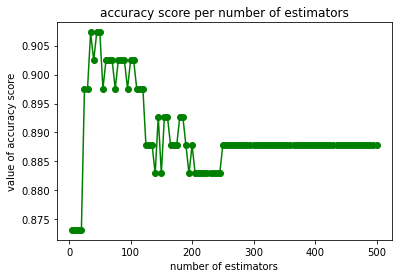

In [99]:
#TODO : Plot validation error versus number of estimators figure.
fig, ax = plt.subplots()
ax.set_title('accuracy score per number of estimators')
ax.set_xlabel('number of estimators')
ax.set_ylabel('value of accuracy score')
ax.plot(n_estimator_list, accuracy_list, '-go')
fig.show()

In [100]:
#TODO : Print the best number for estimators and minimum value for validation error.
max_accuracy = np.max(accuracy_list)
index_max_accuracy = np.where(accuracy_list==max_accuracy)[0]
best_n_estimator = n_estimator_list[index_max_accuracy]
print("max accuracy:", max_accuracy)
print("best number of estimators:", best_n_estimator)

max accuracy: 0.9073170731707317
best number of estimators: [35 45 50]


### Weighted Error (10 points)

C:\Users\mohammad\AppData\Local\Temp\ipykernel_11380\3784881976.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


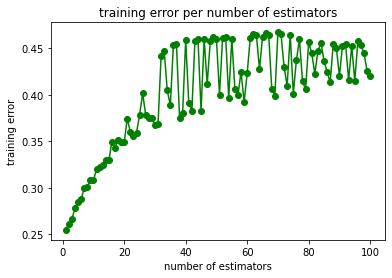

In [101]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

training_error = AdaBoostClassifier.training_errors
number_of_estimators = np.array([i+1 for i in range(len(training_error))])

fig2, ax2 = plt.subplots()
ax2.set_title('training error per number of estimators')
ax2.set_xlabel('number of estimators')
ax2.set_ylabel('training error')
ax2.plot(number_of_estimators, training_error, '-go')
fig2.show()


### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In [10]:
""" 
This is because of the intrinsic of the algorithms. As we know updating the weights is done
considering correct classified or incorrect classified items. When number of estimators increase
there will be an increase in the complexity of the model, then an increase in the training error
is expected.

"""

1
